In [17]:
# Imports & Settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
     
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style('whitegrid')

# Load environment variables
from dotenv import load_dotenv
import os
from pathlib import Path

# Load .env file from current directory
env_path = Path('.env')
load_dotenv(env_path)

True

In [18]:
# Get path from environment variables
path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# Full History for all the strategies
path = path_daily_returns_strategies

# print(f"Data file path: {path}")

In [19]:
# read csv file from path
df = pd.read_csv(path, sep=';') 

df.head()

,Date,Profit_pct_100
0,2023-04-17,0.05
1,2023-04-18,-0.00
2,2023-04-19,-0.01
3,2023-04-20,-0.00
4,2023-04-21,0.00


In [20]:
# df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            642 non-null    object 
 1   Profit_pct_100  642 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [21]:
# Convert the Date column to string and slice to obtain year, month, and day values
df['Year'] = df['Date'].astype(str).str.slice(0, 4).astype(int)
df['Month'] = df['Date'].astype(str).str.slice(5, 7).astype(int)
df['Day'] = df['Date'].astype(str).str.slice(8, 10).astype(int)

# drop the Date column
df.drop(columns=['Date'], inplace=True)

# Convert the Year, Month, and Day columns to a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the Year, Month, and Day columns as they are no longer needed
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# rename the columns to Date and Profit (%)
df.rename(columns={'Profit_pct_100': 'Profit (%)'}, inplace=True)

# columns order
cols = ['Date', 'Profit (%)']

# Reorder the DataFrame columns
df = df[cols]

df.set_index('Date', inplace=True)

df.head()

,Profit (%)
Date,
2023-04-17,0.05
2023-04-18,-0.00
2023-04-19,-0.01
2023-04-20,-0.00
2023-04-21,0.00


In [22]:
# daily_returns are a series as the Profit (%) column
daily_returns = df['Profit (%)']

daily_returns.head()

Date
2023-04-17    0.05
2023-04-18   -0.00
2023-04-19   -0.01
2023-04-20   -0.00
2023-04-21    0.00
Name: Profit (%), dtype: float64

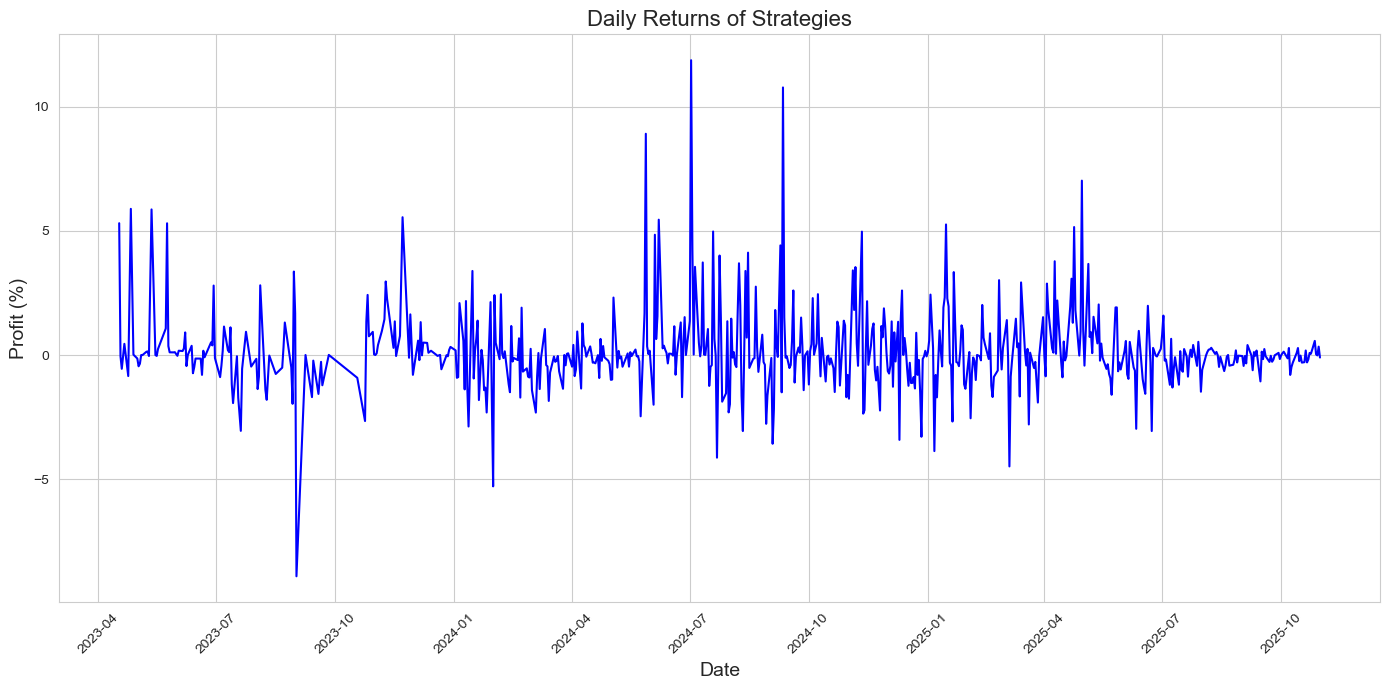

In [23]:
# plot daily_returns
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_returns*100, color='blue', linewidth=1.5)
plt.title('Daily Returns of Strategies', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Montecarlo Simulation

# Simulation parameters
num_simulations = 1000  # Number of simulations

forecast_days = 365  # Investment horizon in days
desired_return = 0.10  # Desired return (10%)

initial_investment = 100000  # Initial investment amount

# Initilize the simulation array with zeros
simulations = np.zeros((num_simulations, forecast_days))

# Simulate future path
for i in range(num_simulations):
    cumulative_returns = np.random.choice(daily_returns, size=forecast_days, replace=True).cumsum()
    simulations[i, :] = initial_investment * (1 + cumulative_returns)

print(simulations)

[[ 99199.49   98891.81   99053.96  ... 143335.215 143601.49  142428.88 ]
 [ 99267.325  99311.255  99109.395 ... 151410.695 151598.275 151954.005]
 [100146.07   97598.53  104622.64  ... 103840.005 103700.58  101786.87 ]
 ...
 [ 99959.67  106983.78  106485.31  ... 107915.735 108670.355 114534.83 ]
 [100394.94   99836.6    99919.41  ... 107413.39  107788.89  106120.22 ]
 [ 99684.08   99666.59   97787.98  ... 151649.635 152546.135 153317.055]]


In [25]:
type(simulations)

numpy.ndarray

In [26]:
simulations.shape

(1000, 365)

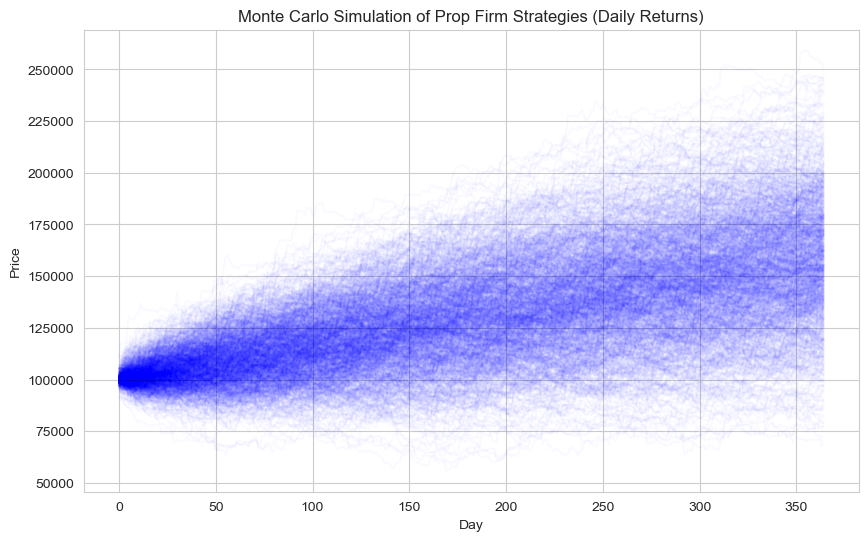

In [27]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(simulations.T, color="blue", alpha=0.025)
plt.title("Monte Carlo Simulation of Prop Firm Strategies (Daily Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()

In [28]:
# Calculate the average daily return
average_daily_return = daily_returns.mean()

# Calculate volatility as the standard deviation of daily returns
volatility = daily_returns.std()

print(f"Average Daily Return: {average_daily_return}")
print(f"Volatility: {volatility}")

Average Daily Return: 0.0015805116043613727
Volatility: 0.016461282822315435


In [29]:
# Simulating future returns
simulated_end_returns = np.zeros(num_simulations)
for i in range(num_simulations):
    random_returns = np.random.normal(average_daily_return, volatility, forecast_days)
    cumulative_return = np.prod(1 + random_returns)
    simulated_end_returns[i] = initial_investment * cumulative_return

# Calculate the final investment values
final_investment_values = simulated_end_returns

print(final_investment_values)

[244921.34487824 252176.63969738 148380.54005669 246913.14505271
 143435.43583453 238790.26686442 244625.71483803 198409.23610378
 148635.60250503 197556.61492953 203743.65380404 129707.35139432
 181138.0086959  108912.22027266 111748.94917975 142788.21922911
 182775.55075361 262605.5092574  210381.41239219 227060.86723368
 224931.06006166 191299.28153923  75108.77901401 143131.37070142
 180767.21177185  93027.23031823 130257.31575766 308208.93697077
 280023.79524121 129058.15220946  98552.03269293 122521.84390921
 182048.1299442  174854.18147077 135650.6787264  222975.03756462
 151000.7791417  139705.90180934 244008.04627133 177056.37979766
 181626.14731503 133245.98562151 145244.61243664 152781.08081578
 148323.15971907 204774.56321568 173823.03129646 177184.09896671
 148368.41337437 182298.12461052 193350.41814214 203901.87578123
 138878.439999   129791.54334893 154231.49619281 151504.31254601
 210687.28216587 169837.74896308 142612.97888335 159650.95626365
 145950.16380184 221893.5

In [30]:
confidence_level = 0.95
sorted_returns = np.sort(final_investment_values)
index_at_var = int((1-confidence_level) * num_simulations)
var = initial_investment - sorted_returns[index_at_var]
conditional_var = initial_investment - sorted_returns[:index_at_var].mean()

print(f"Value at Risk (95% confidence): ${var:,.2f}")
print(f"Expected Tail Loss (Conditional VaR): ${conditional_var:,.2f}")

Value at Risk (95% confidence): $-634.78
Expected Tail Loss (Conditional VaR): $11,334.66


In [31]:
desired_return = 0.10  # Desired return

num_success = np.sum(final_investment_values >= initial_investment * (1 + desired_return))
probability_of_success = num_success / num_simulations

print(f"Probability of achieving at least a {desired_return*100}% return: {probability_of_success*100:.2f}%")

Probability of achieving at least a 10.0% return: 91.60%


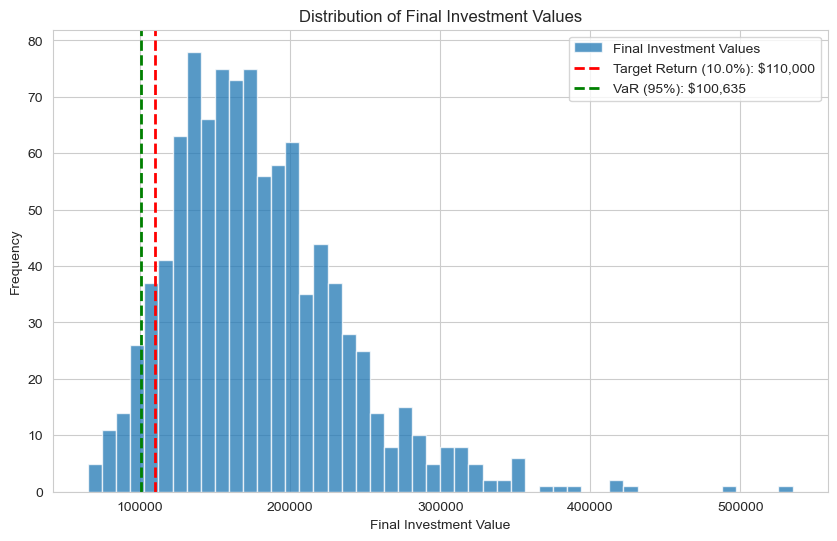

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(final_investment_values, bins=50, alpha=0.75, label='Final Investment Values')
plt.axvline(
    initial_investment * (1 + desired_return),
    color="r",
    linestyle="dashed",
    linewidth=2,
    label=f'Target Return ({desired_return*100}%): ${initial_investment * (1 + desired_return):,.0f}'
)
plt.axvline(initial_investment - var, color="g", linestyle="dashed", linewidth=2, 
           label=f'VaR (95%): ${initial_investment - var:,.0f}')
plt.title("Distribution of Final Investment Values")
plt.xlabel("Final Investment Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()